<a href="https://colab.research.google.com/github/weedge/doraemon-nb/blob/main/achatbot_kimivl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install

In [ ]:
!cd /content && rm -rf achatbot && git clone --recursive https://github.com/ai-bot-pro/achatbot.git -b feat/vision

In [ ]:
%cd /content/achatbot

/content/achatbot


In [ ]:
!bash scripts/pypi_achatbot.sh dev


In [ ]:
!pip install -q "dist/achatbot-0.0.9.31-py3-none-any.whl[llm_transformers_manual_vision_kimi,daily_room_audio_stream,livekit,livekit-api,sense_voice_asr,deepgram_asr_processor,tts_edge,openai,queue]"

In [ ]:
!pip install -q flash-attn --no-build-isolation


In [23]:
!pip list | grep -E "transformers|accelerate|torch|tiktoken|blobfile|torchvision|numpy|flash_attn"


accelerate                         0.28.0
blobfile                           3.0.0
flash_attn                         2.7.4.post1
numpy                              1.26.0
pytorch-wpe                        0.0.1
sentence-transformers              3.4.1
tiktoken                           0.7.0
torch                              2.2.2
torch-complex                      0.4.4
torchaudio                         2.2.2
torchsummary                       1.5.1
torchvision                        0.17.2
transformers                       4.50.3


# download

In [6]:
!huggingface-cli download FunAudioLLM/SenseVoiceSmall --quiet --local-dir /content/models/FunAudioLLM/SenseVoiceSmall

/content/models/FunAudioLLM/SenseVoiceSmall


In [7]:
!huggingface-cli download --quiet Qwen/Qwen2-VL-7B-Instruct --local-dir /content/models/Qwen/Qwen2-VL-7B-Instruct

/content/models/Qwen/Qwen2-VL-7B-Instruct


In [8]:
!huggingface-cli download --quiet Qwen/Qwen2.5-VL-7B-Instruct --local-dir /content/models/Qwen/Qwen2.5-VL-7B-Instruct

/content/models/Qwen/Qwen2.5-VL-7B-Instruct


In [17]:
!huggingface-cli download --quie moonshotai/Kimi-VL-A3B-Instruct --local-dir /content/models/moonshotai/Kimi-VL-A3B-Instruct

/content/models/moonshotai/Kimi-VL-A3B-Instruct


In [ ]:
!huggingface-cli download --quie moonshotai/Kimi-VL-A3B-Thinking --local-dir /content/models/moonshotai/Kimi-VL-A3B-Thinking

/content/models/moonshotai/Kimi-VL-A3B-Thinking


# test

In [ ]:
!LLM_DEVICE=cuda PROMPT=讲一个故事 LLM_MODEL_NAME_OR_PATH=/content/models/moonshotai/Kimi-VL-A3B-Instruct \
  python -m unittest test.core.llm.test_transformers_v_kimi.TestTransformersVKimi.test_chat_completion_prompts

2025-04-10 14:08:32,896 - numexpr.utils - INFO - /usr/local/lib/python3.11/dist-packages/numexpr/utils.py:162 - _init_num_threads - NumExpr defaulting to 12 threads.
2025-04-10 14:08:34.491581: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-10 14:08:34.510566: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744294114.532381   17984 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744294114.539183   17984 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has a

In [ ]:
!LLM_DEVICE=cuda PROMPT=讲一个故事 LLM_MODEL_NAME_OR_PATH=/content/models/moonshotai/Kimi-VL-A3B-Thinking \
  python -m unittest test.core.llm.test_transformers_v_kimi.TestTransformersVKimi.test_chat_completion_prompts

2025-04-10 14:14:02,697 - numexpr.utils - INFO - /usr/local/lib/python3.11/dist-packages/numexpr/utils.py:162 - _init_num_threads - NumExpr defaulting to 12 threads.
2025-04-10 14:14:04.307578: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-10 14:14:04.327401: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744294444.350347   19425 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744294444.357410   19425 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has a

# run vision bot with webrtc

In [9]:
from google.colab import userdata
DAILY_API_KEY=userdata.get('DAILY_API_KEY')

LIVEKIT_URL=userdata.get('LIVEKIT_URL')
LIVEKIT_API_KEY=userdata.get('LIVEKIT_API_KEY')
LIVEKIT_API_SECRET=userdata.get('LIVEKIT_API_SECRET')


run bot task woker with bot.json, e.g.: dummy_bot.json

- use daily/livekit room stream, u can click bot joined the room url, to start chat with bot with audio and camera stream,
  - [daily](https://www.daily.co/) need DAILY_API_KEY
  - [livekit](https://livekit.io/) need project url LIVEKIT_URL, LIVEKIT_API_KEY, LIVEKIT_API_SECRET



## qwen2-vl-7B

In [12]:
!cat /content/livekit_describe_transformers_vision_bot.json

{
  "chat_bot_name": "LivekitDescribeVisionBot",
  "room_name": "chat-bot",
  "room_url": "",
  "token": "",
  "room_manager": {
    "tag": "livekit_room",
    "args": {
      "bot_name": "LivekitDescribeVisionBot",
      "is_common_session": false
    }
  },
  "services": {
    "pipeline": "achatbot",
    "vad": "silero",
    "asr": "sense_voice",
    "llm": "transformers_manual_vision_qwen",
    "tts": "edge"
  },
  "config": {
    "vad": {
      "tag": "silero_vad_analyzer",
      "args": { "stop_secs": 0.7 }
    },
    "asr": {
      "tag": "sense_voice_asr",
      "args": {
        "language": "zn",
        "model_name_or_path": "/content/models/FunAudioLLM/SenseVoiceSmall"
      }
    },
    "llm": {
      "tag": "llm_transformers_manual_vision_qwen",
      "args": {
        "lm_device": "cuda",
        "lm_model_name_or_path": "/content/models/Qwen/Qwen2-VL-7B-Instruct",
        "chat_history_size": 0,
        "init_chat_prompt": "请用中文交流",
        "model_type": "chat_completion"

In [13]:
!LIVEKIT_URL=$LIVEKIT_URL LIVEKIT_API_KEY=$LIVEKIT_API_KEY LIVEKIT_API_SECRET=$LIVEKIT_API_SECRET \
  python -m src.cmd.bots.main -f /content/livekit_describe_transformers_vision_bot.json

{
    "chat_bot_name": "LivekitDescribeVisionBot",
    "config": {
        "asr": {
            "args": {
                "language": "zn",
                "model_name_or_path": "/content/models/FunAudioLLM/SenseVoiceSmall"
            },
            "tag": "sense_voice_asr"
        },
        "llm": {
            "args": {
                "chat_history_size": 0,
                "init_chat_prompt": "\u8bf7\u7528\u4e2d\u6587\u4ea4\u6d41",
                "lm_device": "cuda",
                "lm_model_name_or_path": "/content/models/Qwen/Qwen2-VL-7B-Instruct",
                "model_type": "chat_completion"
            },
            "language": "zh",
            "tag": "llm_transformers_manual_vision_qwen"
        },
        "tts": {
            "args": {
                "gender": "Male",
                "language": "zh",
                "voice_name": "zh-CN-YunjianNeural"
            },
            "tag": "tts_edge"
        },
        "vad": {
            "args": {
                "sto

## qwen2.5-vl-7B

In [14]:
!cat /content/livekit_describe_transformers_vision_bot.json

{
  "chat_bot_name": "LivekitDescribeVisionBot",
  "room_name": "chat-bot",
  "room_url": "",
  "token": "",
  "room_manager": {
    "tag": "livekit_room",
    "args": {
      "bot_name": "LivekitDescribeVisionBot",
      "is_common_session": false
    }
  },
  "services": {
    "pipeline": "achatbot",
    "vad": "silero",
    "asr": "sense_voice",
    "llm": "transformers_manual_vision_qwen2_5",
    "tts": "edge"
  },
  "config": {
    "vad": {
      "tag": "silero_vad_analyzer",
      "args": { "stop_secs": 0.7 }
    },
    "asr": {
      "tag": "sense_voice_asr",
      "args": {
        "language": "zn",
        "model_name_or_path": "/content/models/FunAudioLLM/SenseVoiceSmall"
      }
    },
    "llm": {
      "tag": "llm_transformers_manual_vision_qwen2_5",
      "args": {
        "lm_device": "cuda",
        "lm_model_name_or_path": "/content/models/Qwen/Qwen2.5-VL-7B-Instruct",
        "chat_history_size": 0,
        "init_chat_prompt": "请用中文交流",
        "model_type": "chat_com

In [16]:
!LIVEKIT_URL=$LIVEKIT_URL LIVEKIT_API_KEY=$LIVEKIT_API_KEY LIVEKIT_API_SECRET=$LIVEKIT_API_SECRET \
  python -m src.cmd.bots.main -f /content/livekit_describe_transformers_vision_bot.json

{
    "chat_bot_name": "LivekitDescribeVisionBot",
    "config": {
        "asr": {
            "args": {
                "language": "zn",
                "model_name_or_path": "/content/models/FunAudioLLM/SenseVoiceSmall"
            },
            "tag": "sense_voice_asr"
        },
        "llm": {
            "args": {
                "chat_history_size": 0,
                "init_chat_prompt": "\u8bf7\u7528\u4e2d\u6587\u4ea4\u6d41",
                "lm_device": "cuda",
                "lm_model_name_or_path": "/content/models/Qwen/Qwen2.5-VL-7B-Instruct",
                "model_type": "chat_completion"
            },
            "language": "zh",
            "tag": "llm_transformers_manual_vision_qwen2_5"
        },
        "tts": {
            "args": {
                "gender": "Male",
                "language": "zh",
                "voice_name": "zh-CN-YunjianNeural"
            },
            "tag": "tts_edge"
        },
        "vad": {
            "args": {
               

## Kimi-VL-A3B-Instruct

In [24]:
!cat /content/livekit_describe_transformers_vision_bot.json

{
  "chat_bot_name": "LivekitDescribeVisionBot",
  "room_name": "chat-bot",
  "room_url": "",
  "token": "",
  "room_manager": {
    "tag": "livekit_room",
    "args": {
      "bot_name": "LivekitDescribeVisionBot",
      "is_common_session": false
    }
  },
  "services": {
    "pipeline": "achatbot",
    "vad": "silero",
    "asr": "sense_voice",
    "llm": "transformers_manual_vision_kimi",
    "tts": "edge"
  },
  "config": {
    "vad": {
      "tag": "silero_vad_analyzer",
      "args": { "stop_secs": 0.7 }
    },
    "asr": {
      "tag": "sense_voice_asr",
      "args": {
        "language": "zn",
        "model_name_or_path": "/content/models/FunAudioLLM/SenseVoiceSmall"
      }
    },
    "llm": {
      "tag": "llm_transformers_manual_vision_kimi",
      "args": {
        "lm_device": "cuda",
        "lm_model_name_or_path": "/content/models/moonshotai/Kimi-VL-A3B-Instruct",
        "chat_history_size": 0,
        "lm_torch_dtype":"bfloat16",
        "lm_attn_impl":"flash_atte

{
    "chat_bot_name": "LivekitDescribeVisionBot",
    "config": {
        "asr": {
            "args": {
                "language": "zn",
                "model_name_or_path": "/content/models/FunAudioLLM/SenseVoiceSmall"
            },
            "tag": "sense_voice_asr"
        },
        "llm": {
            "args": {
                "chat_history_size": 0,
                "init_chat_prompt": "\u8bf7\u7528\u4e2d\u6587\u4ea4\u6d41",
                "lm_attn_impl": "flash_attention_2",
                "lm_device": "cuda",
                "lm_model_name_or_path": "/content/models/moonshotai/Kimi-VL-A3B-Instruct",
                "lm_torch_dtype": "bfloat16",
                "model_type": "chat_completion"
            },
            "language": "zh",
            "tag": "llm_transformers_manual_vision_kimi"
        },
        "tts": {
            "args": {
                "gender": "Male",
                "language": "zh",
                "voice_name": "zh-CN-YunjianNeural"
          
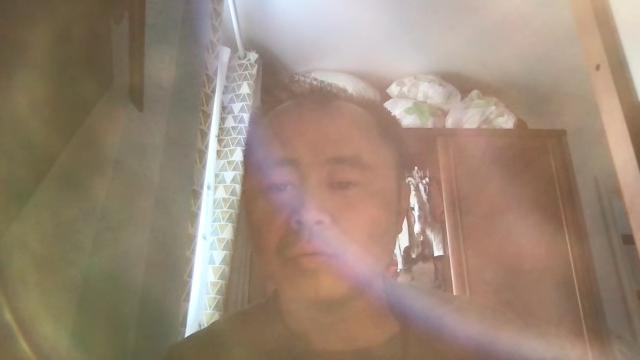
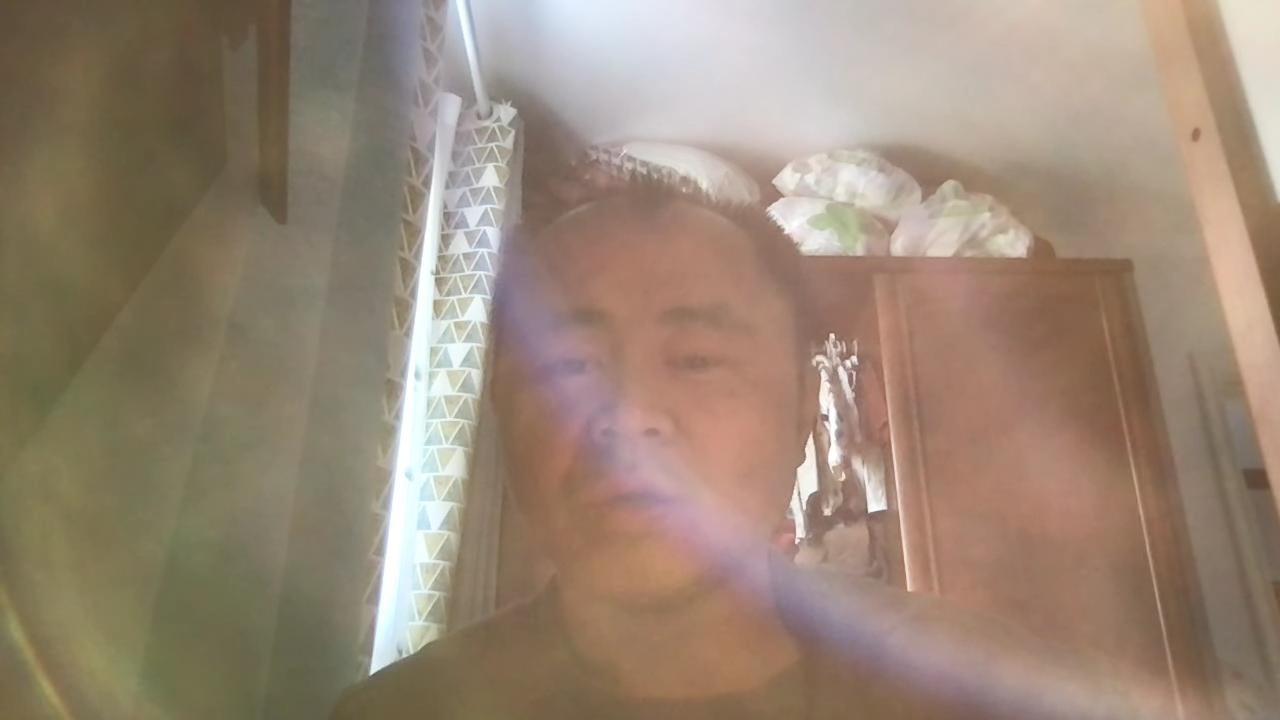
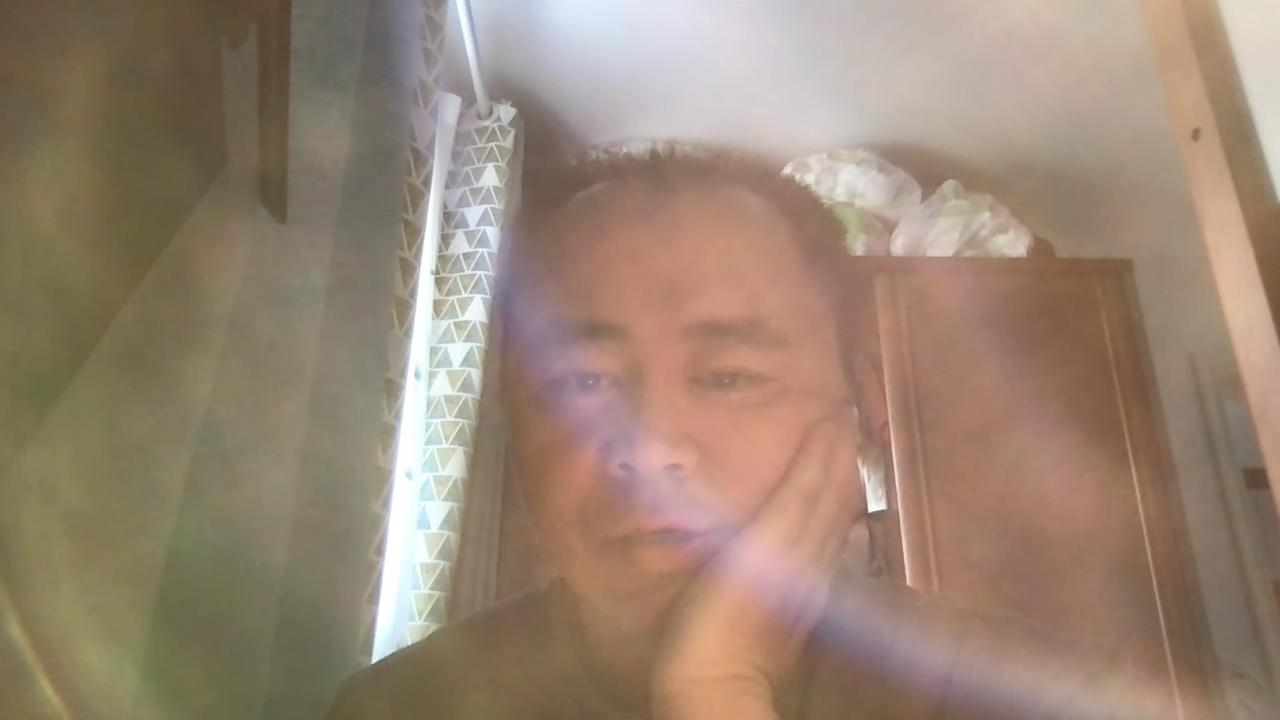
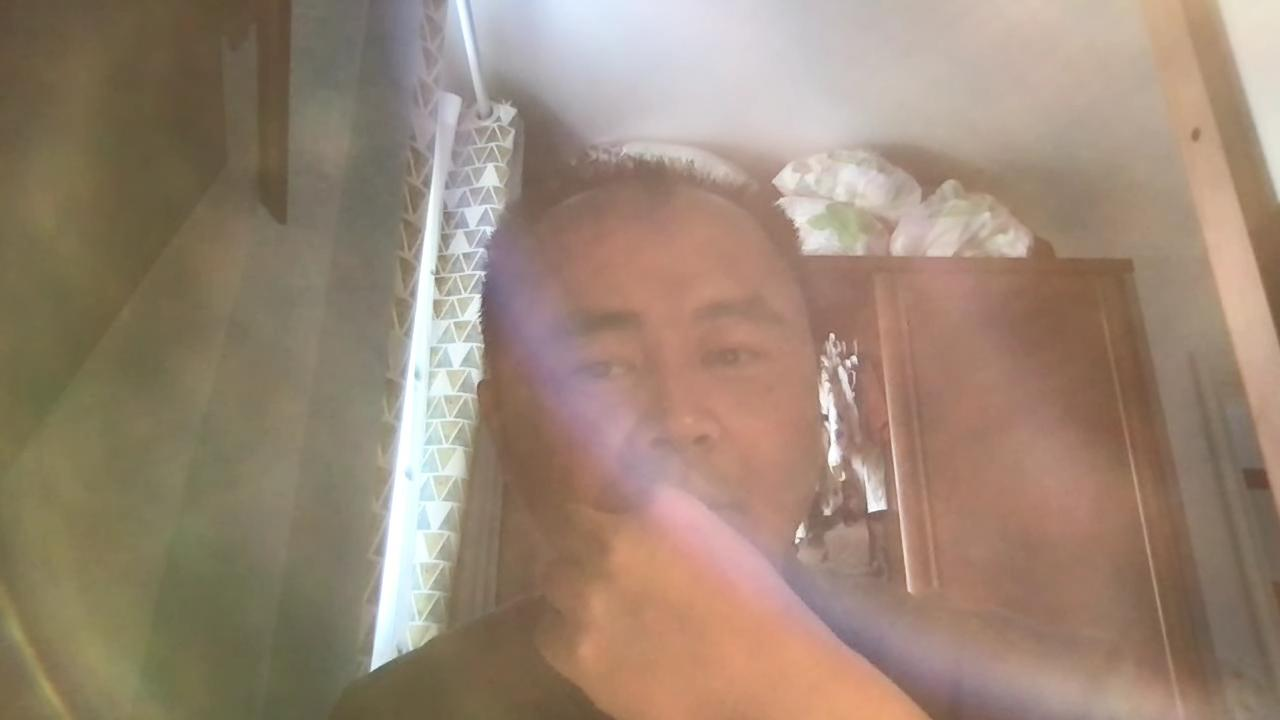
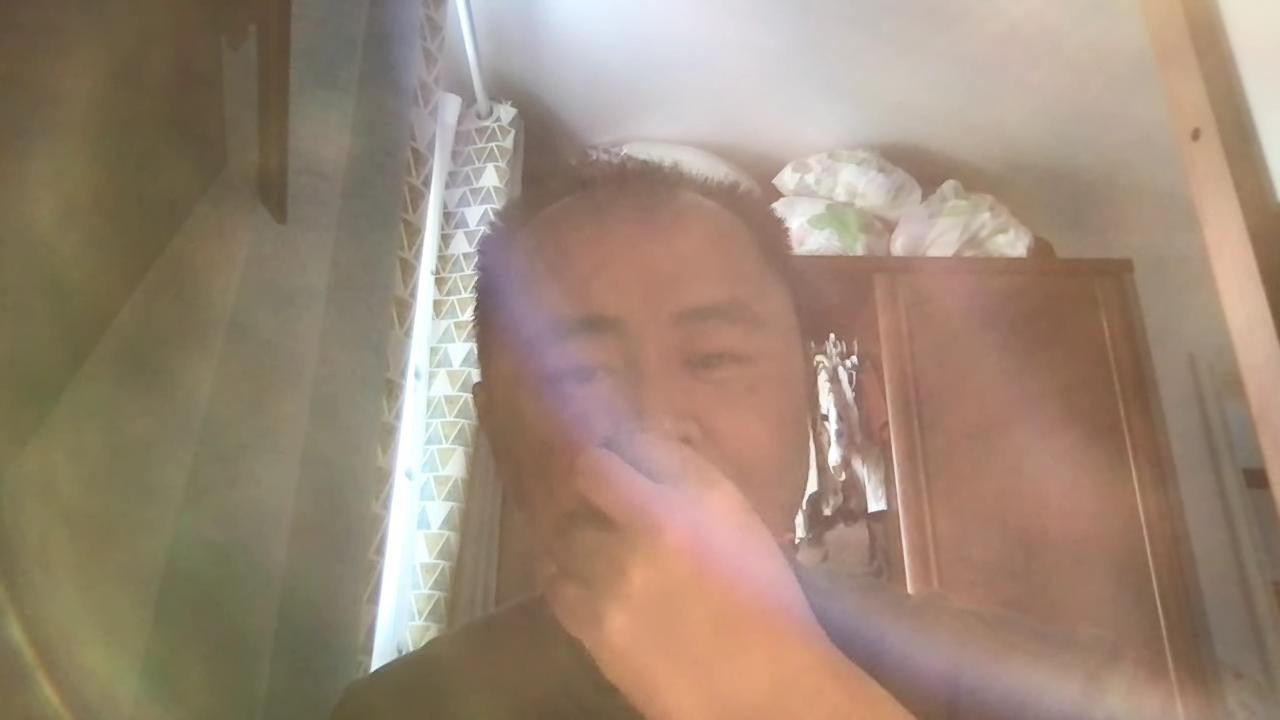
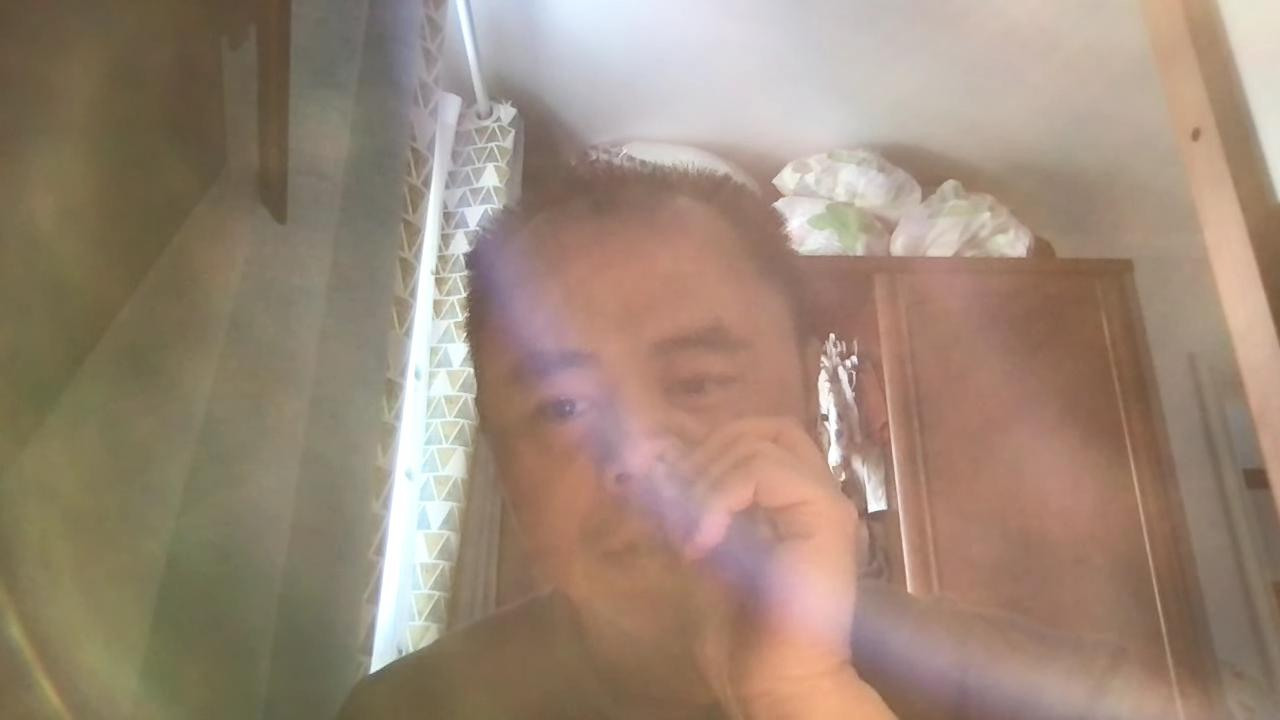
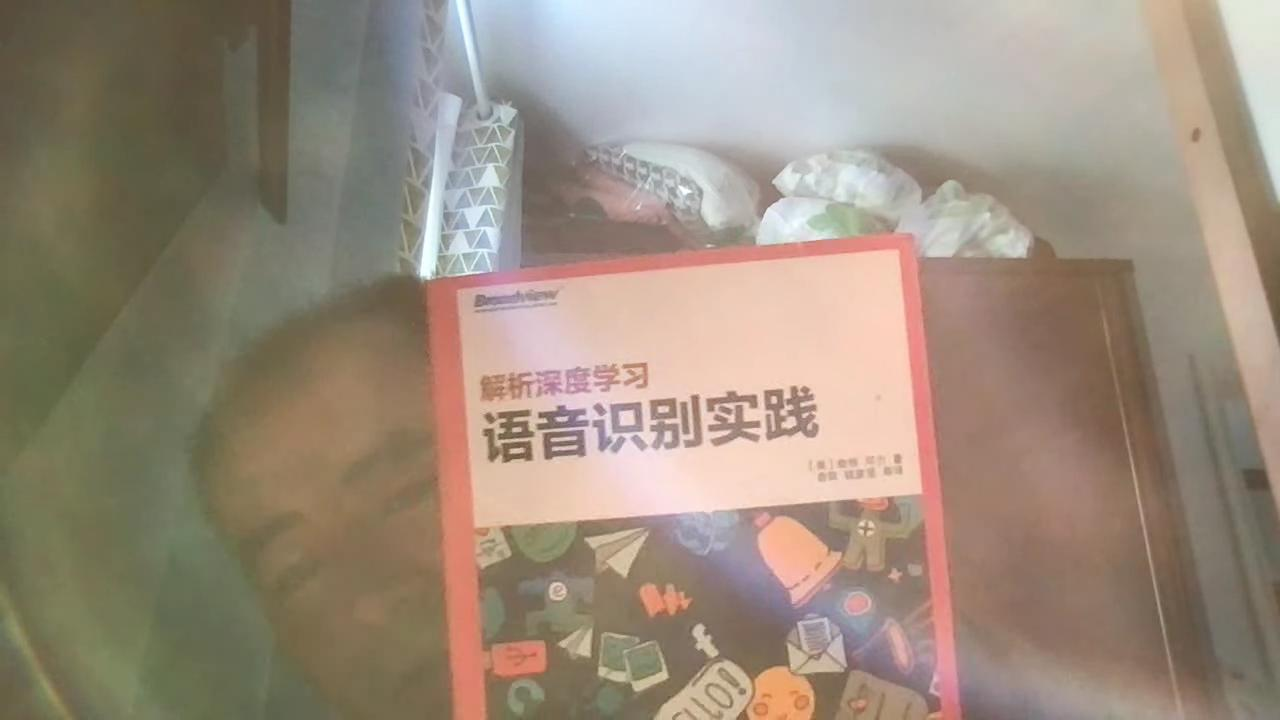
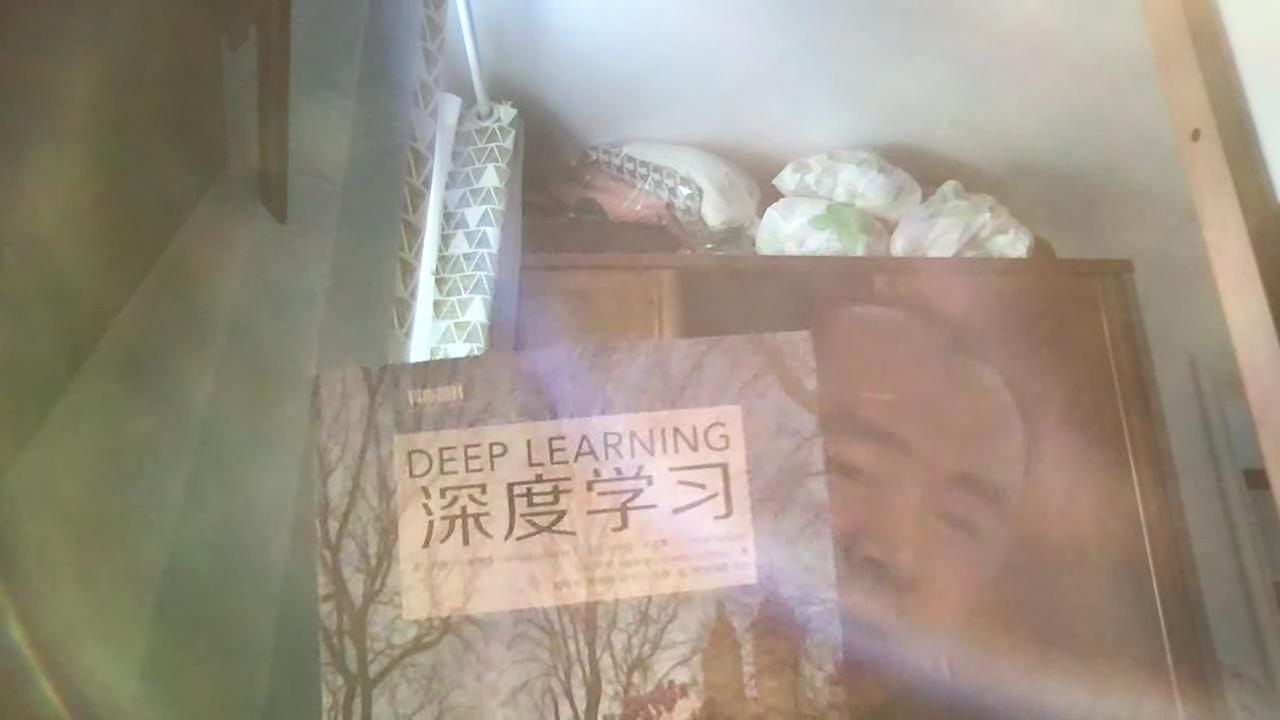
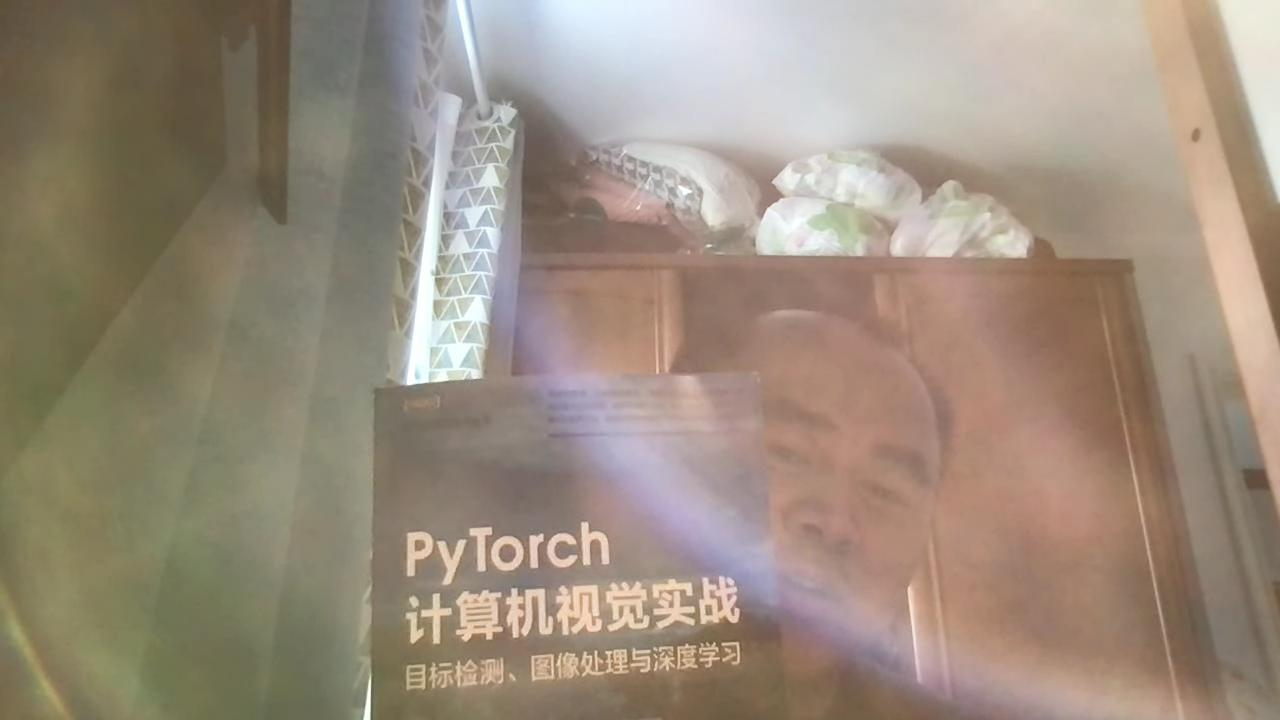
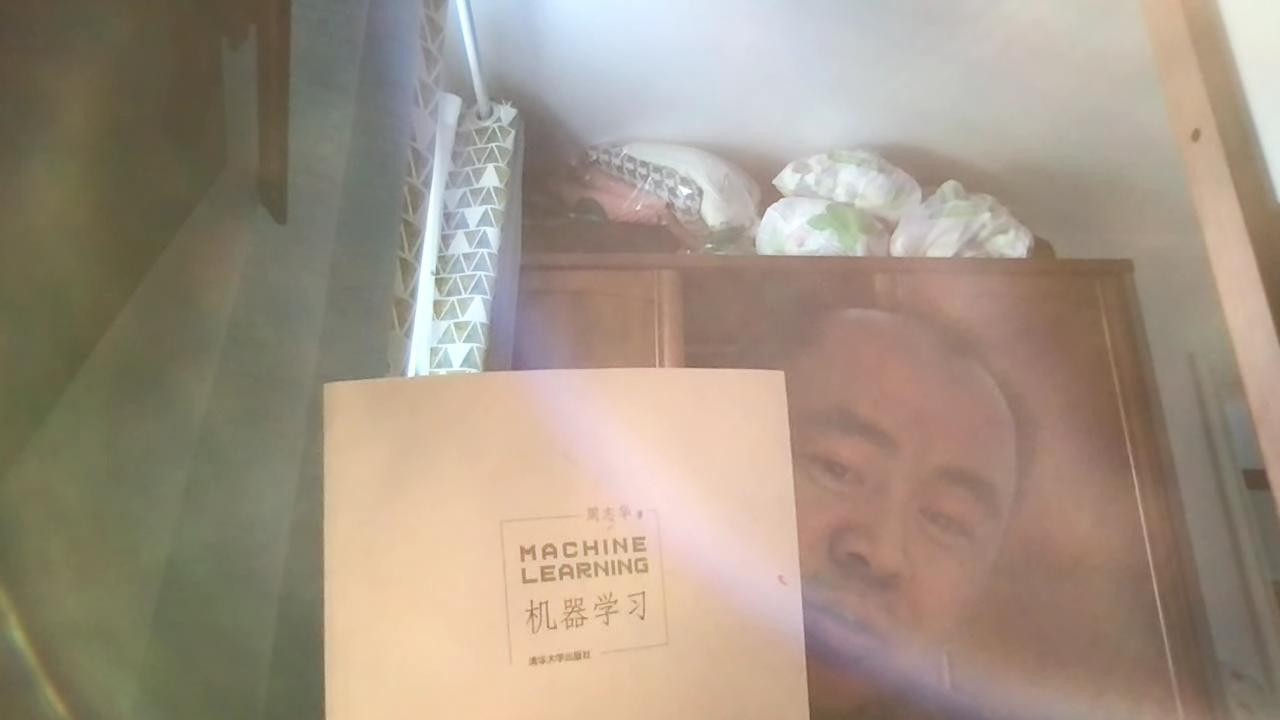
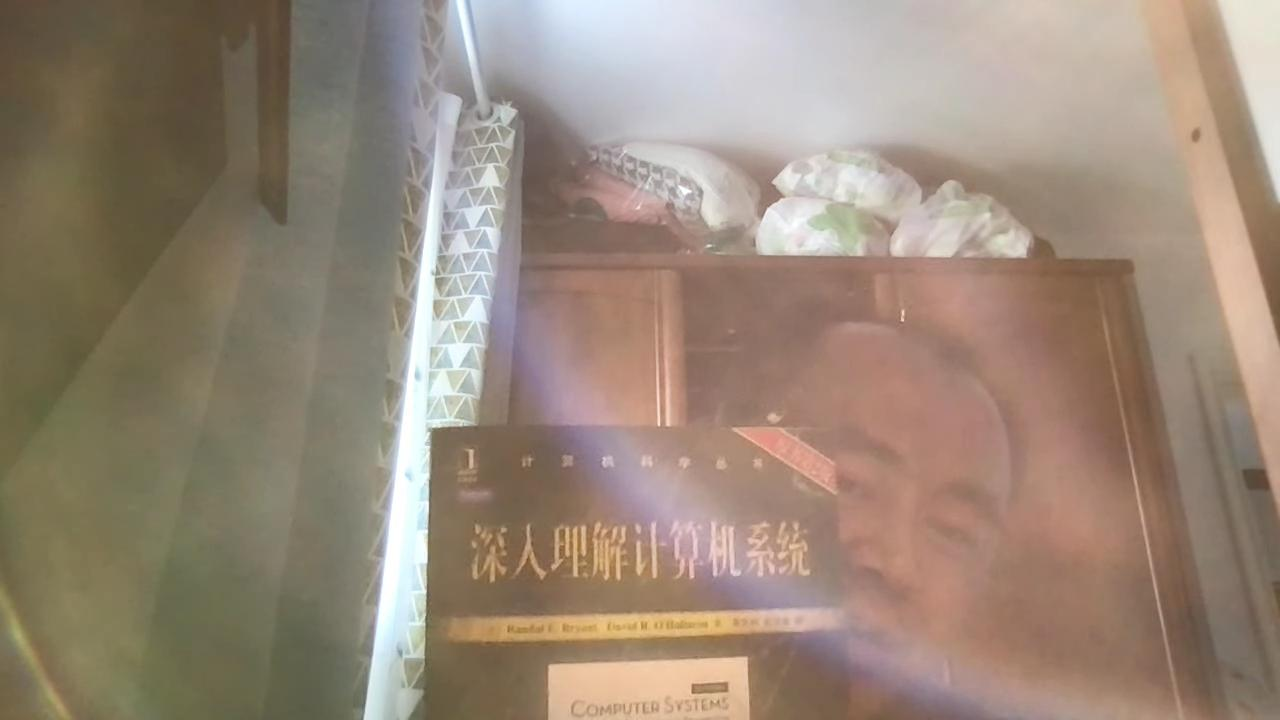
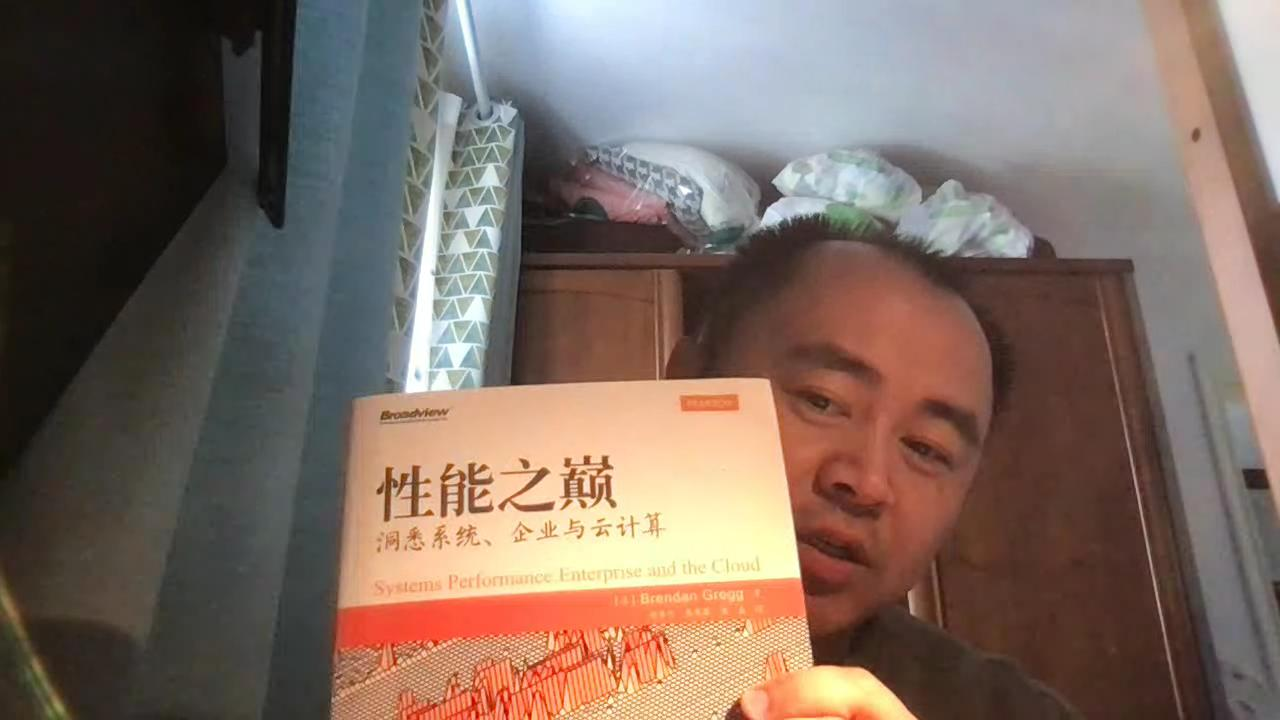

In [27]:
!PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True LIVEKIT_URL=$LIVEKIT_URL LIVEKIT_API_KEY=$LIVEKIT_API_KEY LIVEKIT_API_SECRET=$LIVEKIT_API_SECRET \
  python -m src.cmd.bots.main -f /content/livekit_describe_transformers_vision_bot.json

# 总结

- 128k的输入上下文文本长度，Instruct 很适合多模态文本图片视频聊天, 不过需要占用更多的显存
- 生成文本质量评估结果不错
- 对于一般的多模态感知与理解、OCR、长视频和长文档、视频感知以及代理用途，推荐使用 Kimi-VL-A3B-Instruct 进行高效推理；
- 对于高级文本和多模态推理（例如数学），请考虑使用 Kimi-VL-A3B-Thinking 。